# LCLS-II Exercise
### ***Special thanks to Irene Wang and Aditya Thapa for the LCLS-II input files!***

In [2]:
from genesis.version4 import Genesis4

## Scanning parameters

In the last notebook, we ran a base line LCLS-II simulation.
In this notebook, you will scan a parameter and plot how the performance changes.

<div class="alert alert-block alert-info">

Using the LCLS-II lattice file, try scanning some of the following:
- Peak current
- Energy spread
- Tapering

How does the performance change?
<div>

In [3]:
G = Genesis4("examples/lcls-II.in")
G.verbose = False
#G.input

In [4]:
output = G.run()

[PC100405:86667] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/3730571264/sm_segment.PC100405.1062988918.de5c0000.0 could be created.


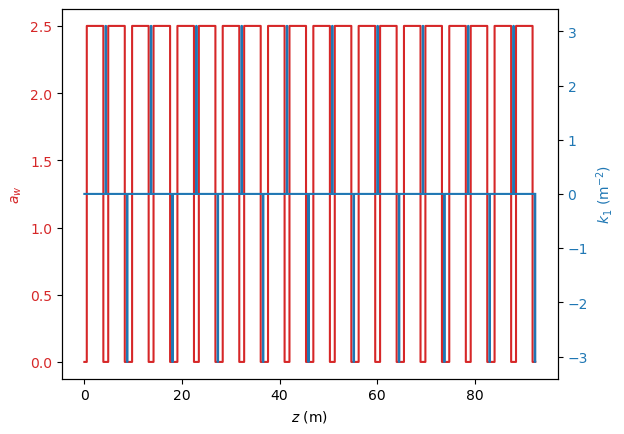

<Axes: xlabel='$z$ (m)', ylabel='$a_w$'>

In [5]:
output.lattice.plot()

<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

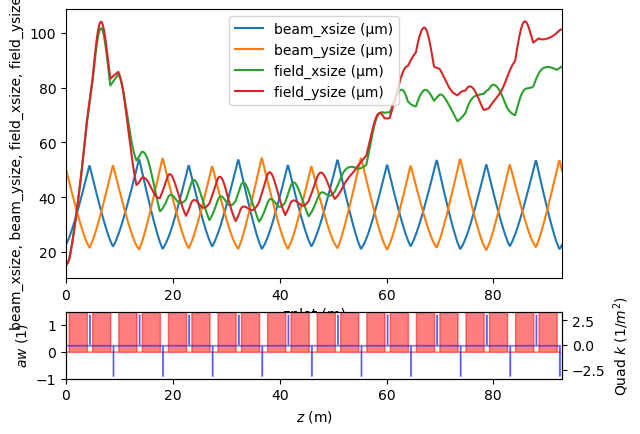

In [6]:
G.plot(["beam_xsize", "beam_ysize", "field_xsize", "field_ysize"])

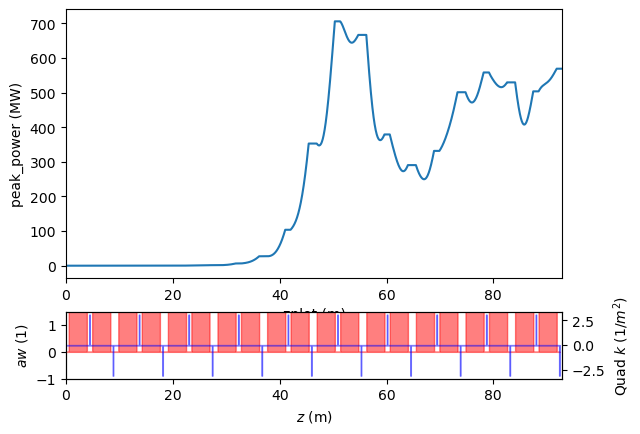

In [7]:
G.plot(["field_power"])

### Beam and field sizes

In [7]:
import matplotlib.pyplot as plt

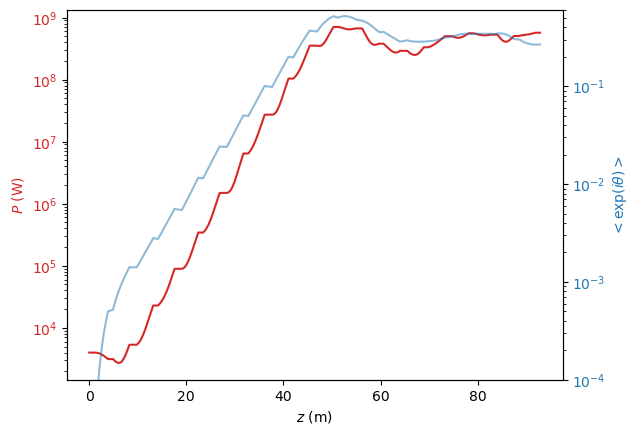

In [8]:
z = output.lattice.zplot
b = output.beam.bunching
p = output.field.power

fig, ax1 = plt.subplots()
color = "tab:red"
ax1.set_xlabel(r"$z$ (m)")
ax1.set_ylabel(r"$P$ (W)", color=color)
ax1.tick_params(axis="y", labelcolor=color)
ax1.semilogy(z, p, color=color)

ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel(r"$<\exp(i\theta)>$", color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.semilogy(z, b, color=color, alpha=0.5)
ax2.set_ylim([1e-4, 0.6])
plt.show()

In [15]:
import numpy as np

In [10]:
# Scan peak current

G_scan = G
current_list = np.linspace(500, 2000, 5)
scan_output = []

for current in current_list:
    G_scan.input.main.beam.current = current
    G_scan.verbose = False
    scan_output.append(G_scan.run())

[PC100405:80341] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/3049586688/sm_segment.PC100405.1062988918.b5c50000.0 could be created.
[PC100405:80342] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/1431109632/sm_segment.PC100405.1062988918.554d0000.0 could be created.
[PC100405:80343] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/599785472/sm_segment.PC100405.1062988918.23c00000.0 could be created.
[PC100405:80344] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/3100639232/sm_segment.PC100405.1062988918.b8d00000.0 could be created.
[PC100405:80364] shmem: mmap: an error occurred while determining whether

In [19]:
import matplotlib.pyplot as plt

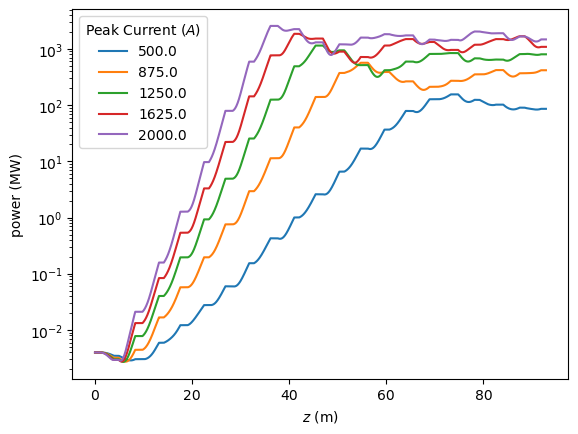

In [12]:
fig, ax = plt.subplots()
for k, g in zip(current_list, scan_output):
    x = g.stat("zplot")
    y = g.stat("power")
    ax.plot(x, y / 1e6, label=f"{k:0.1f}")
ax.set_yscale("log")
ax.set_xlabel(r"$z$ (m)")
ax.set_ylabel("power (MW)")
plt.legend(title=r"Peak Current $(A)$")

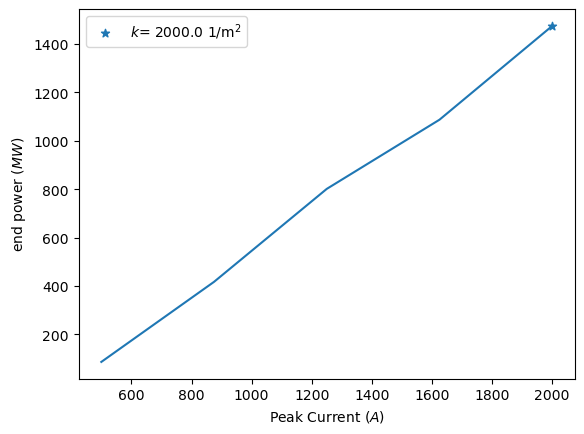

In [13]:
fig, ax = plt.subplots()
y = np.array([g.stat("power")[-1] for g in scan_output])
ixbest = y.argmax()
Gbest = scan_output[ixbest]
current_best = current_list[ixbest]
ybest = y[ixbest]
ax.plot(current_list, y / 1e6)
ax.scatter(current_best, ybest / 1e6, marker="*", label=rf"$k$= {current_best:0.1f} 1/m$^2$")
ax.set_ylabel(r"end power $(MW)$")
ax.set_xlabel(r"Peak Current $(A)$")
plt.legend()

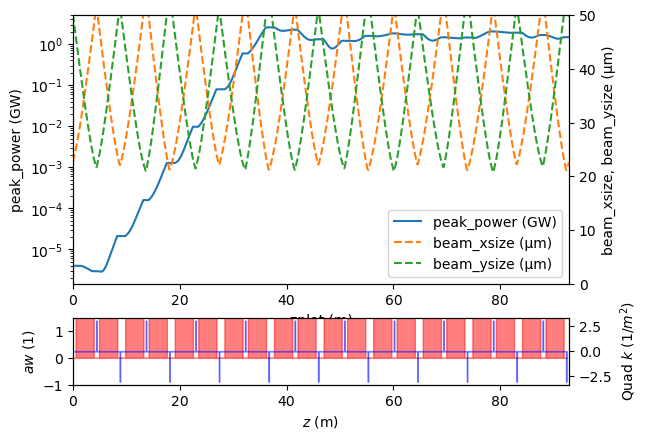

In [14]:
G_scan.plot("power", yscale="log", y2=["beam_xsize", "beam_ysize"], ylim2=(0, 50e-6))

In [15]:
# No taper

output.load_particles()
pbeg = output.particles['beginning']
pend = output.particles['end']

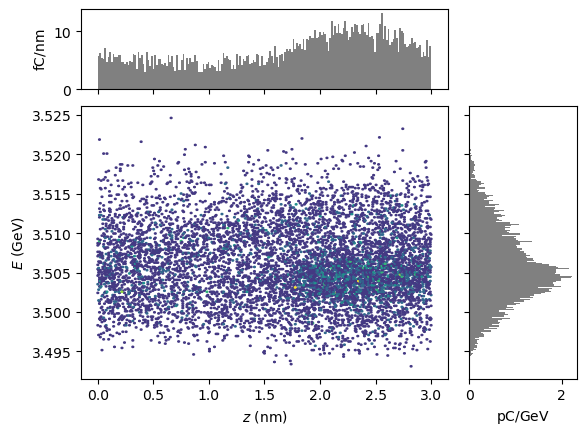

In [16]:
pend.plot("z", "energy", bins = 200) # No taper

# Taper!

## Trying linear taper. Not very agressive. Check file **LCLS00-TAPER1.in** for lattice

In [17]:
# try some taper

G_taper1 = Genesis4("examples/LCLSII-TAPER1.in")
G_taper1.verbose = True
G_taper1.input

Genesis4Input(
  main=MainInput(
    namelists=[
      Setup(
        rootname='LCLSII',
        lattice='LCLSII-TAPER1.lat',
        beamline='FEL',
        gamma0=6862.0,
        lambda0=3e-09,
        delz=0.039,
        nbins=8,
        shotnoise=False,
      ),
      LatticeNamelist(zmatch=9.0),
      Field(power=4000.0, waist_size=3e-05, dgrid=0.0002, ngrid=255),
      Beam(delgam=1.0, ex=1.2e-06, ey=1.24e-06),
      Write(beam='beginning'),
      Track(),
      Write(beam='end'),
    ],
    filename=pathlib.Path('/Users/aaditya/Documents/GitHub/slacpas/examples/LCLSII-TAPER1.in'),
  ),
  lattice=Lattice(
    elements={
      'D1': Drift(L=0.5),
      'D2': Drift(L=0.45),
      'QF': Quadrupole(L=0.1, k1=3.1),
      'QD': Quadrupole(L=0.1, k1=-3.1),
      'UND': Undulator(aw=2.5, lambdau=0.039, nwig=87),
      'UND1': Undulator(aw=2.498, lambdau=0.039, nwig=87),
      'UND2': Undulator(aw=2.496, lambdau=0.039, nwig=87),
      'UND3': Undulator(aw=2.494, lambdau=0.039, nwig=87),
      'UND4': Undulator(aw=2.492, lambdau=0.039, nwig=87),
      'UND5': Undulator(aw=2.49, lambdau=0.039, nwig=87),
      'UND6': Undulator(aw=2.488, lambdau=0.039, nwig=87),
      'UND7': Undulator(aw=2.486, lambdau=0.039, nwig=87),
      'UND8': Undulator(aw=2.484, lambdau=0.039, nwig=87),
      'UND9': Undulator(aw=2.482, lambdau=0.039, nwig=87),
      'UND10': Undulator(aw=2.48, lambdau=0.039, nwig=87),
      'FODO': Line(elements=['D1', 'UND', 'D2', 'QF', 'D2', 'UND', 'D2', 'QD', 'D2']),
      'FODO1': Line(elements=['D1', 'UND1', 'D2', 'QF', 'D2', 'UND2', 'D2', 'QD', 'D2']),
      'FODO2': Line(elements=['D1', 'UND3', 'D2', 'QF', 'D2', 'UND4', 'D2', 'QD', 'D2']),
      'FODO3': Line(elements=['D1', 'UND5', 'D2', 'QF', 'D2', 'UND6', 'D2', 'QD', 'D2']),
      'FODO4': Line(elements=['D1', 'UND7', 'D2', 'QF', 'D2', 'UND8', 'D2', 'QD', 'D2']),
      'FODO5': Line(elements=['D1', 'UND9', 'D2', 'QF', 'D2', 'UND10', 'D2', 'QD', 'D2']),
      'FEL': Line(
        elements=[
          DuplicatedLineItem(label='FODO', count=5),
          'FODO1',
          'FODO2',
          'FODO3',
          'FODO4',
          'FODO5',
        ],
      ),
    },
    filename=pathlib.Path('/Users/aaditya/Documents/GitHub/slacpas/examples/LCLSII-TAPER1.lat'),
  ),
  source_path=pathlib.Path('/Users/aaditya/Documents/GitHub/slacpas/examples'),
)

In [18]:
taper1 = G_taper1.run()

Configured to run in: /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T/tmps1gpxi5c
Running Genesis4 in /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T/tmps1gpxi5c
/Users/aaditya/opt/anaconda3/envs/fel2024/bin/genesis4 -l LCLSII-TAPER1.lat genesis4.in
---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by runner at 2024-06-10 16:26:41 [UTC] from Git Commit ID: 
Starting Time: Mon Aug 12 23:50:55 2024

MPI-Comm Size: 1 node

Opened input file genesis4.in
Parsing lattice file LCLSII-TAPER1.lat ...
Matching for periodic solution between z = 0 and z = 9 :
   betax (m) : 2.94989
   alphax    : -0.4868
   phix (deg): 87.595
   betay (m) : 13.9016
   alphay    : 2.17265
   phiy (deg): 92.2785
Generating input radiation field for HARM = 1 ...
Generating input particle distribution...
Writing particle distribution to file: beginning.par.h5 ...

Running Core Simulation...
Steady-state run
Initial analysis of electron beam and radiation fiel

[PC100405:80367] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/3717070848/sm_segment.PC100405.1062988918.dd8e0000.0 could be created.


  Calculation: 10% done
  Calculation: 20% done
  Calculation: 30% done
  Calculation: 40% done
  Calculation: 50% done
  Calculation: 60% done
  Calculation: 70% done
  Calculation: 80% done
  Calculation: 90% done
Writing output file...

Core Simulation done.
End of Track
Writing particle distribution to file: end.par.h5 ...

Program is terminating...
Ending Time: Mon Aug 12 23:51:06 2024
Total Wall Clock Time: 10.6568 seconds
-------------------------------------
Success - execution took 10.89s.


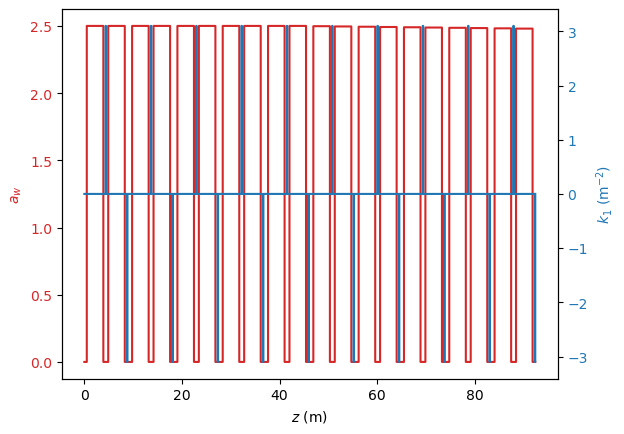

In [19]:
taper1.lattice.plot();

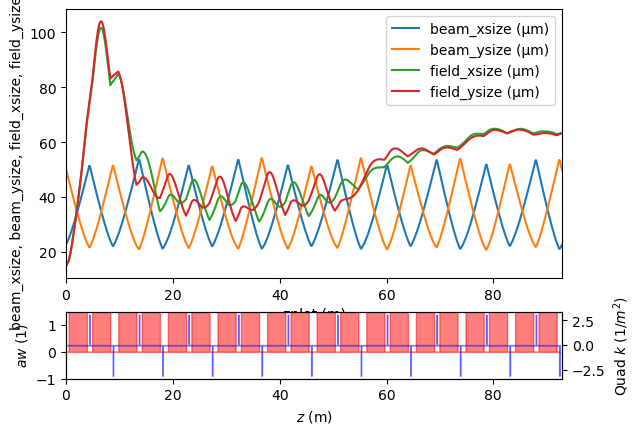

In [20]:
G_taper1.plot(["beam_xsize", "beam_ysize", "field_xsize", "field_ysize"])

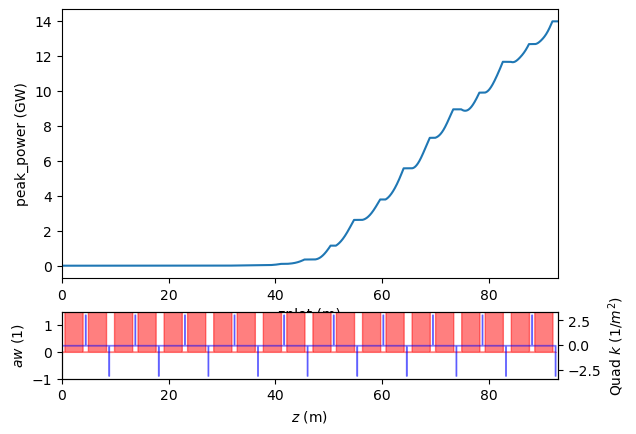

In [21]:
G_taper1.plot("field_power")

In [22]:
taper1.load_particles()
pbeg1 = taper1.particles['beginning']
pend1 = taper1.particles['end']

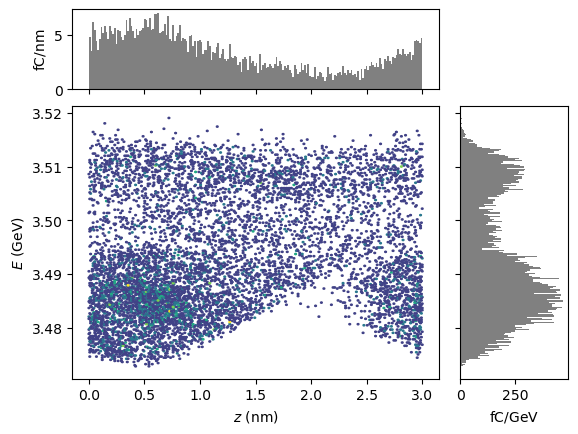

In [23]:
pend1.plot("z", "energy", bins=200)

In [39]:
# Scan peak current

G_scan_1 = G_taper1
current_list_1 = np.linspace(500, 3000, 5)
scan_output_1 = []

for current in current_list_1:
    G_scan_1.input.main.beam.current = current
    G_scan_1.verbose = False
    scan_output_1.append(G_scan_1.run())

[PC100405:80384] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/1223360512/sm_segment.PC100405.1062988918.48eb0000.0 could be created.
[PC100405:80385] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/1926823936/sm_segment.PC100405.1062988918.72d90000.0 could be created.
[PC100405:80386] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/2101084160/sm_segment.PC100405.1062988918.7d3c0000.0 could be created.
[PC100405:80387] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/4283760640/sm_segment.PC100405.1062988918.ff550000.0 could be created.
[PC100405:80390] shmem: mmap: an error occurred while determining whethe

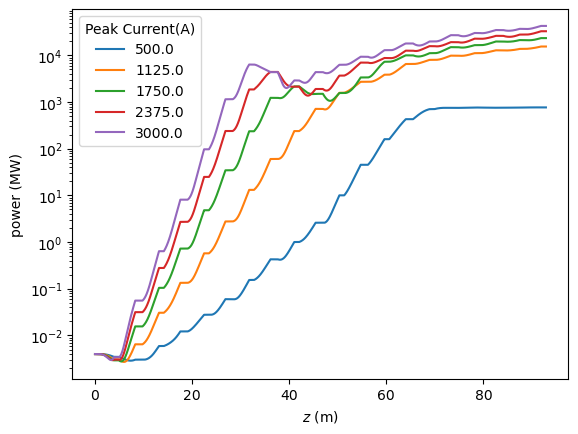

In [40]:
fig, ax = plt.subplots()
for k, g in zip(current_list_1, scan_output_1):
    x = g.stat("zplot")
    y = g.stat("power")
    ax.plot(x, y / 1e6, label=f"{k:0.1f}")
ax.set_yscale("log")
ax.set_xlabel(r"$z$ (m)")
ax.set_ylabel("power (MW)")
plt.legend(title="Peak Current(A)")

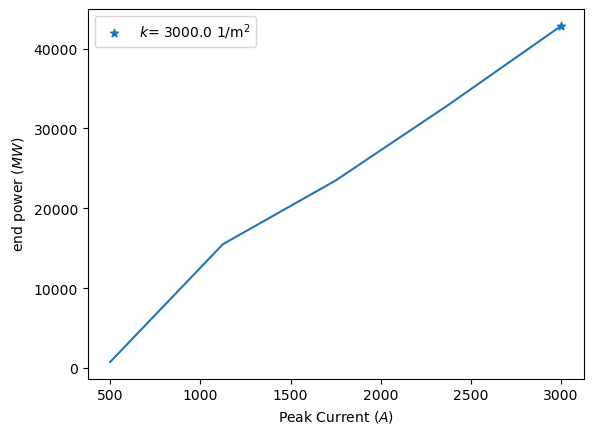

In [41]:
fig, ax = plt.subplots()
y = np.array([g.stat("power")[-1] for g in scan_output_1])
ixbest = y.argmax()
Gbest = scan_output_1[ixbest]
current_best_1 = current_list_1[ixbest]
ybest = y[ixbest]
ax.plot(current_list_1, y / 1e6)
ax.scatter(current_best_1, ybest / 1e6, marker="*", label=rf"$k$= {current_best_1:0.1f} 1/m$^2$")
ax.set_ylabel(r"end power $(MW)$")
ax.set_xlabel(r"Peak Current $(A)$")
plt.legend()

## Trying more agressive linear taper. Check file **LCLS00-TAPER2.in** for lattice

In [42]:
# more agressive taper
G_taper2 = Genesis4("examples/LCLSII-TAPER2.in")
G_taper2.verbose = True
G_taper2.input

Genesis4Input(
  main=MainInput(
    namelists=[
      Setup(
        rootname='LCLSII',
        lattice='LCLSII-TAPER2.lat',
        beamline='FEL',
        gamma0=6862.0,
        lambda0=3e-09,
        delz=0.039,
        nbins=8,
        shotnoise=False,
      ),
      LatticeNamelist(zmatch=9.0),
      Field(power=4000.0, waist_size=3e-05, dgrid=0.0002, ngrid=255),
      Beam(delgam=1.0, ex=1.2e-06, ey=1.24e-06),
      Write(beam='beginning'),
      Track(),
      Write(beam='end'),
    ],
    filename=pathlib.Path('/Users/aaditya/Documents/GitHub/slacpas/examples/LCLSII-TAPER2.in'),
  ),
  lattice=Lattice(
    elements={
      'D1': Drift(L=0.5),
      'D2': Drift(L=0.45),
      'QF': Quadrupole(L=0.1, k1=3.1),
      'QD': Quadrupole(L=0.1, k1=-3.1),
      'UND': Undulator(aw=2.5, lambdau=0.039, nwig=87),
      'UND1': Undulator(aw=2.495, lambdau=0.039, nwig=87),
      'UND2': Undulator(aw=2.49, lambdau=0.039, nwig=87),
      'UND3': Undulator(aw=2.485, lambdau=0.039, nwig=87),
      'UND4': Undulator(aw=2.48, lambdau=0.039, nwig=87),
      'UND5': Undulator(aw=2.475, lambdau=0.039, nwig=87),
      'UND6': Undulator(aw=2.47, lambdau=0.039, nwig=87),
      'UND7': Undulator(aw=2.465, lambdau=0.039, nwig=87),
      'UND8': Undulator(aw=2.46, lambdau=0.039, nwig=87),
      'UND9': Undulator(aw=2.455, lambdau=0.039, nwig=87),
      'UND10': Undulator(aw=2.45, lambdau=0.039, nwig=87),
      'FODO': Line(elements=['D1', 'UND', 'D2', 'QF', 'D2', 'UND', 'D2', 'QD', 'D2']),
      'FODO1': Line(elements=['D1', 'UND1', 'D2', 'QF', 'D2', 'UND2', 'D2', 'QD', 'D2']),
      'FODO2': Line(elements=['D1', 'UND3', 'D2', 'QF', 'D2', 'UND4', 'D2', 'QD', 'D2']),
      'FODO3': Line(elements=['D1', 'UND5', 'D2', 'QF', 'D2', 'UND6', 'D2', 'QD', 'D2']),
      'FODO4': Line(elements=['D1', 'UND7', 'D2', 'QF', 'D2', 'UND8', 'D2', 'QD', 'D2']),
      'FODO5': Line(elements=['D1', 'UND9', 'D2', 'QF', 'D2', 'UND10', 'D2', 'QD', 'D2']),
      'FEL': Line(
        elements=[
          DuplicatedLineItem(label='FODO', count=5),
          'FODO1',
          'FODO2',
          'FODO3',
          'FODO4',
          'FODO5',
        ],
      ),
    },
    filename=pathlib.Path('/Users/aaditya/Documents/GitHub/slacpas/examples/LCLSII-TAPER2.lat'),
  ),
  source_path=pathlib.Path('/Users/aaditya/Documents/GitHub/slacpas/examples'),
)

In [28]:
taper2 = G_taper1.run()

[PC100405:80373] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/639827968/sm_segment.PC100405.1062988918.26230000.0 could be created.


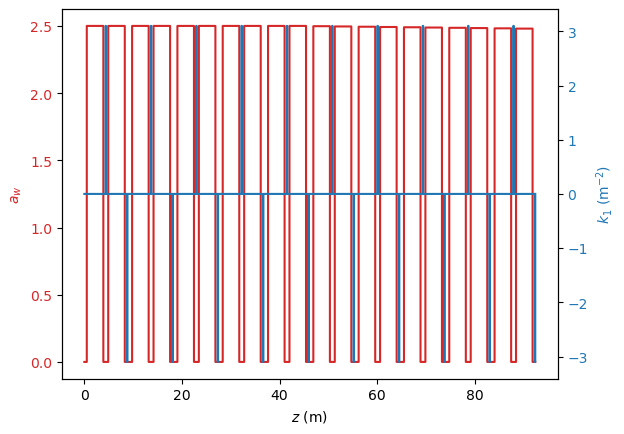

In [29]:
taper2.lattice.plot();

In [30]:
# Scan peak current

G_scan_2 = G_taper2
current_list_2 = np.linspace(500, 3000, 5)
scan_output_2 = []

for current in current_list_2:
    G_scan_2.input.main.beam.current = current
    G_scan_2.verbose = False
    scan_output_2.append(G_scan_2.run())

[PC100405:80374] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/1496776704/sm_segment.PC100405.1062988918.59370000.0 could be created.
[PC100405:80377] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/2268659712/sm_segment.PC100405.1062988918.87390000.0 could be created.
[PC100405:80378] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/1346043904/sm_segment.PC100405.1062988918.503b0000.0 could be created.
[PC100405:80379] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/1669267456/sm_segment.PC100405.1062988918.637f0000.0 could be created.
[PC100405:80380] shmem: mmap: an error occurred while determining whethe

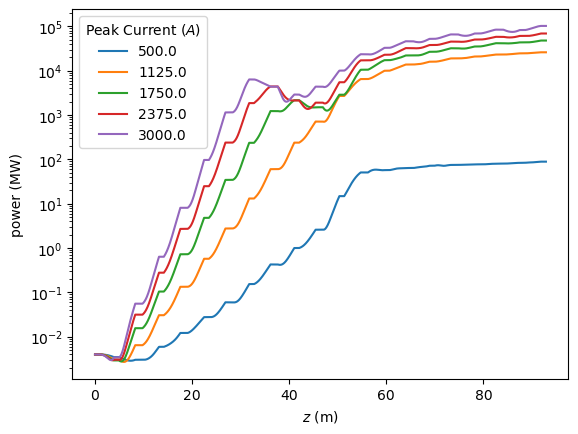

In [31]:
fig, ax = plt.subplots()
for k, g in zip(current_list_2, scan_output_2):
    x = g.stat("zplot")
    y = g.stat("power")
    ax.plot(x, y / 1e6, label=f"{k:0.1f}")
ax.set_yscale("log")
ax.set_xlabel(r"$z$ (m)")
ax.set_ylabel("power (MW)")
plt.legend(title=r"Peak Current $(A)$")

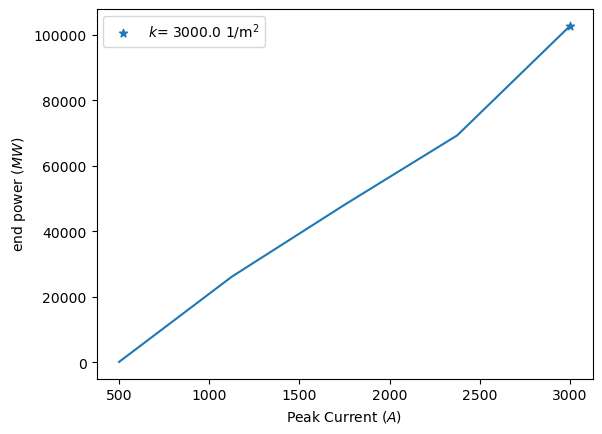

In [32]:
fig, ax = plt.subplots()
y = np.array([g.stat("power")[-1] for g in scan_output_2])
ixbest = y.argmax()
Gbest = scan_output_2[ixbest]
current_best_2 = current_list_2[ixbest]
ybest = y[ixbest]
ax.plot(current_list_2, y / 1e6)
ax.scatter(current_best_2, ybest / 1e6, marker="*", label=rf"$k$= {current_best_2:0.1f} 1/m$^2$")
ax.set_ylabel(r"end power $(MW)$")
ax.set_xlabel(r"Peak Current $(A)$")
plt.legend()

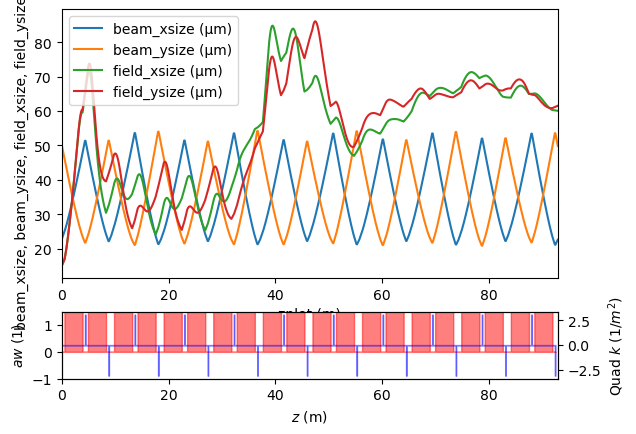

In [33]:
G_taper2.plot(["beam_xsize", "beam_ysize", "field_xsize", "field_ysize"])

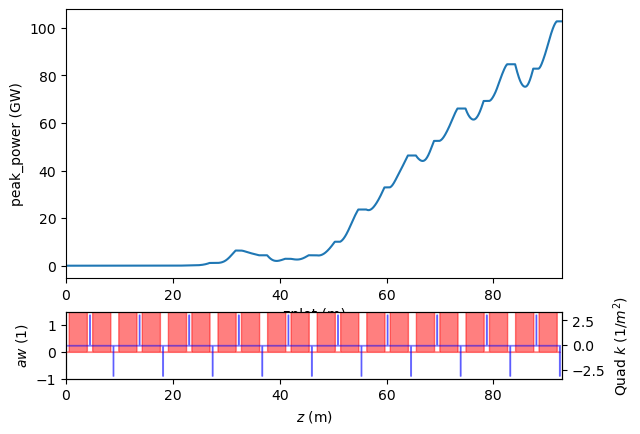

In [34]:
G_taper2.plot("field_power")

In [35]:
taper2.load_particles()
pbeg2 = taper2.particles['beginning']
pend2 = taper2.particles['end'] 

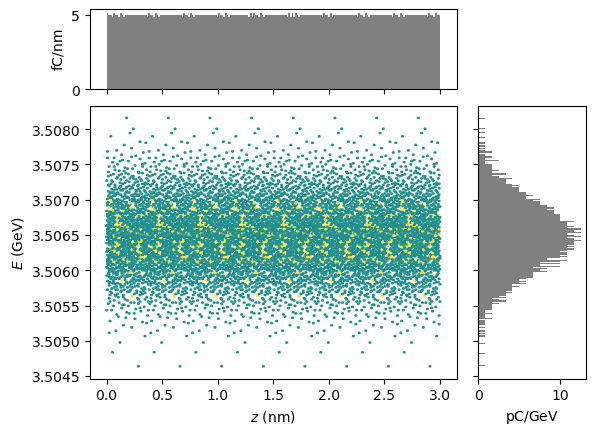

In [36]:
pbeg2.plot("z", "energy", bins=200)

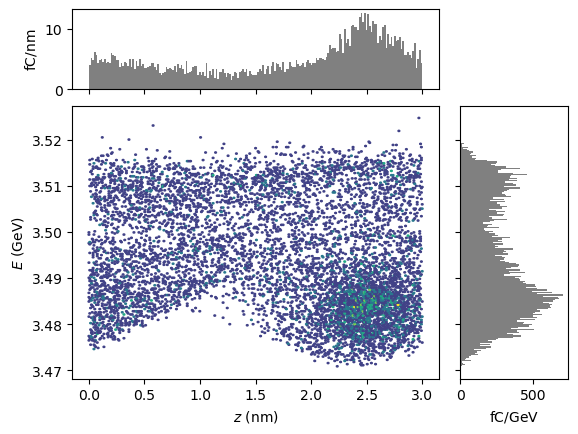

In [37]:
pend2.plot("z", "energy", bins=200)

# Summary (Taper)

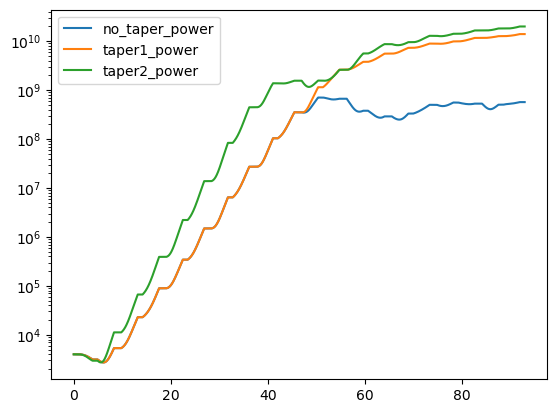

In [38]:
no_taper_power = output.stat("power")
taper1_power = taper1.stat("power")
taper2_power = taper2.stat("power")
y_list = [no_taper_power, taper1_power, taper2_power]
label = ["no_taper_power", "taper1_power", "taper2_power"]
x = g.stat("zplot")

fig, ax = plt.subplots()
for i, (y, ylabel) in enumerate(zip(y_list, label)):
    ax.plot(x, y, label=ylabel)
ax.set_yscale("log")
ax.legend()

# Energy spread

## Scanning through various values of delgam. 

delgam = 1 corresponds to rms energy spread of 0.511 MeV

In [45]:
# Scan energy spread (delgam)

G_scan = G
delgam_list = np.linspace(0, 5, 5)     #delgam = 1 is rms energy spreak of 0.511 MeV
scan_output_delgam = []

for delgam in delgam_list:
    G_scan.input.main.beam.delgam = delgam
    G_scan.verbose = False
    scan_output_delgam.append(G_scan.run())

[PC100405:87428] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/3229024256/sm_segment.PC100405.1062988918.c0770000.0 could be created.
[PC100405:87429] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/1988689920/sm_segment.PC100405.1062988918.76890000.0 could be created.
[PC100405:87430] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/756482048/sm_segment.PC100405.1062988918.2d170000.0 could be created.
[PC100405:87431] shmem: mmap: an error occurred while determining whether or not /var/folders/qx/dyrxp4cj03l5328wsbdkpz20znqv3p/T//ompi.PC100405.1062988918/jf.0/2615083008/sm_segment.PC100405.1062988918.9bdf0000.0 could be created.
[PC100405:87433] shmem: mmap: an error occurred while determining whether

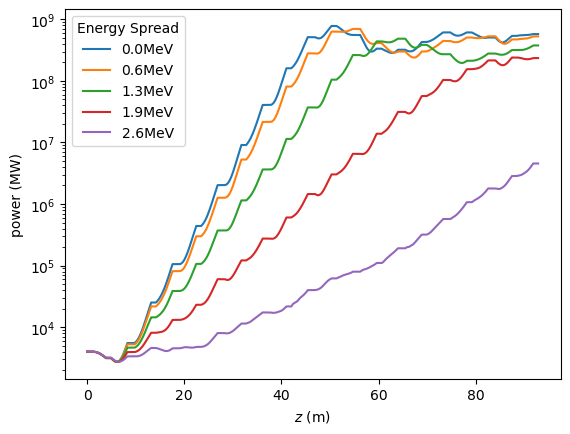

In [44]:
fig, ax = plt.subplots()
for k, g in zip(delgam_list, scan_output_delgam):
    x = g.stat("zplot")
    y = g.stat("power")
    ax.plot(x, y, label=f"{k*0.511:0.1f}MeV")
ax.set_yscale("log")
ax.set_xlabel(r"$z$ (m)")
ax.set_ylabel("power (MW)")
plt.legend(title=r"Energy Spread")

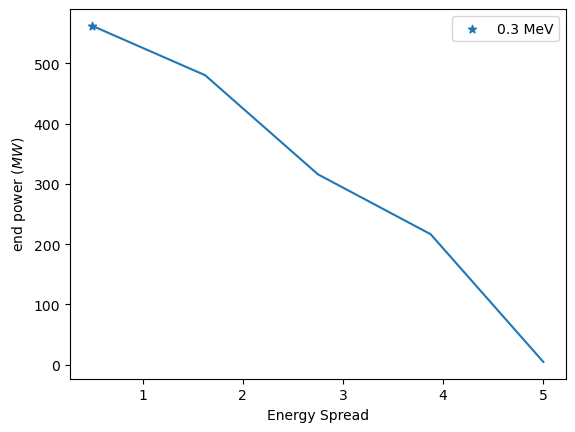

In [35]:
fig, ax = plt.subplots()
y = np.array([g.stat("power")[-1] for g in scan_output_delgam])
ixbest = y.argmax()
Gbest = scan_output_delgam[ixbest]
delgam_best = delgam_list[ixbest]
ybest = y[ixbest]
ax.plot(delgam_list, y / 1e6)
ax.scatter(delgam_best, ybest / 1e6, marker="*", label=rf"{delgam_best*0.511:0.1f} MeV")
ax.set_ylabel(r"end power $(MW)$")
ax.set_xlabel(r"Energy Spread")
plt.legend()

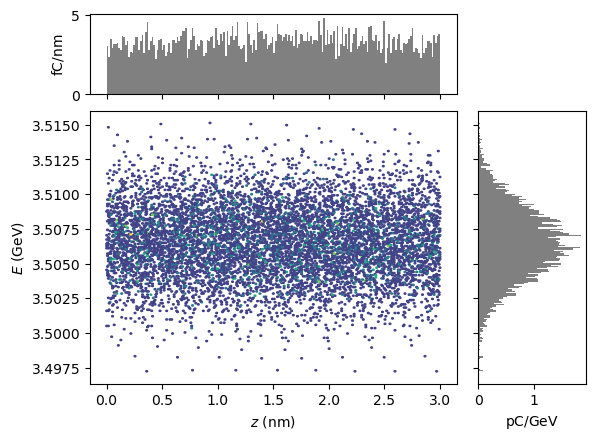

In [42]:
scan_output_delgam[0].load_particles()
pbeg_d = scan_output_delgam[0].particles['beginning']
pend_d = scan_output_delgam[0].particles['end']
pend_d.plot("z", "energy", bins=200)